# Project 2

<bk>
    Dieter Brehm and Corinne Wilklow

In [151]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [152]:
m = UNITS.meter
ft =  UNITS.foot
inch = UNITS.inch


W = UNITS.watt

J = UNITS.joule
btu = UNITS.btu

degC = UNITS.celsius
K = UNITS.kelvin
degF = UNITS.fahrenheit 

hr = UNITS.hour

<Unit('hour')>

In [153]:
data = pd.read_csv('DataOWall.csv', parse_dates=[0], index_col=0, header=0, skiprows=[1,2])
data.head()

,Q_in,Q_out,T_int,T_ext
2014-10-05 16:30:00,10.994,6.840,16.92,14.68
2014-10-05 16:35:00,10.952,6.012,16.92,14.69
2014-10-05 16:40:00,10.882,7.040,16.93,14.66
2014-10-05 16:45:00,10.798,8.880,16.93,14.59
2014-10-05 16:50:00,10.756,10.491,16.94,14.50


Convert Index entries to seconds, noticing the spacing between recordings

In [154]:
timestamp_0 = get_first_label(data)
time_deltas = data.index - timestamp_0;

In [155]:
data.index = time_deltas.days * 86400 + time_deltas.seconds
data.head()

,Q_in,Q_out,T_int,T_ext
0,10.994,6.840,16.92,14.68
300,10.952,6.012,16.92,14.69
600,10.882,7.040,16.93,14.66
900,10.798,8.880,16.93,14.59
1200,10.756,10.491,16.94,14.50


Add units to each dataframe (Q_in, Q_out, T_int, T_ext)

In [156]:
data.Q_in.units = W / m**2
data.Q_out.units = W / m**2
data.T_int.units = degC
data.T_ext.units = degC;

In [194]:
def make_system(init, R, d, SA, m, c):
    """Make a system object for the HIV model.
    
    start_temp: starting temp of room 
    gamma: recovery rate in days
    
    returns: System object
    """
    

    t0 = 0
    t_end = 5000
    dt = 0.001

    return System(init=init, t0=t0, t_end=t_end, dt=dt, R=R, d=d, SA=SA, m=m, c=c)

In [201]:
init = State(T_int=60, T_ext=get_first_value(data.T_ext)*9/5+32)
R = 3 #ft^2*deg5/btu/hr/in
d = 4 #inches

#room dimensions
l = 6 #ft
w = 6 #ft
h = 6 #ft

SA = (l * w * 4 + h * l * 2) * 10.7639 #ft^2
V = l * w * h #m^3

rho = 1 #density of air
g = 9.8 #m/s^2, acceleration due to gravity
m = (rho * V * g) * 2.2 #mass of air in room in lb

c = 0.171 #btu/lbm*R

system = make_system(init, R, d, SA, m, c)

,values
init,T_int 60.000 T_ext 58.424 dtype: float64
t0,0
t_end,5000
dt,0.001
R,3
d,4
SA,2325
m,4656.96
c,0.171


In [202]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end,dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [203]:
def update_func(state, t, system):
    """Update the model.
    
    state: State with variables T_int, T_ext
    dt: time step
    system: System
    
    returns: State object
    """
    
    T_int, T_ext = state
    
    delta_T = T_int - T_ext
    
    dQ= (system.SA * delta_T / (system.R * system.d)) * system.dt
   
    if system.c==0:
        system.c = dQ / delta_T
    
    
    dT = dQ / (system.c * system.m) 
    
    T_int = T_int - dT
    
    #print(dT)
    
    return State(T_int = T_int, T_ext = T_ext)

In [198]:
update_func(system.init, system.t0, system)

,values
T_int,59.999617
T_ext,58.424000


In [199]:
results = run_simulation(system,update_func)

,T_int,T_ext
0.0,60.000000,58.424
0.1,59.999617,58.424
0.2,59.999233,58.424
0.3,59.998850,58.424
0.4,59.998467,58.424
0.5,59.998084,58.424
0.6,59.997701,58.424
0.7,59.997318,58.424
0.8,59.996935,58.424
0.9,59.996552,58.424


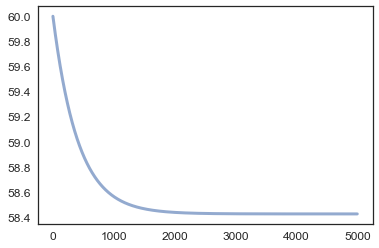

In [200]:
plot(results.T_int)